In [33]:
import os
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, random_split
import random

In [13]:
train_dir = 'data/seg_train/seg_train'
test_dir = 'data/seg_test/seg_test'

In [6]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),         
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [14]:
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset  = datasets.ImageFolder(test_dir, transform=transform)

In [15]:
print("Train dataset classes:", train_dataset.classes)
print("Number of training images:", len(train_dataset))
print("Test dataset classes:", test_dataset.classes)
print("Number of test images:", len(test_dataset))

Train dataset classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Number of training images: 14034
Test dataset classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Number of test images: 3000


In [16]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

print(f"Train subset: {len(train_subset)} images")
print(f"Validation subset: {len(val_subset)} images")

Train subset: 11227 images
Validation subset: 2807 images


In [17]:
batch_size = 32
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)


In [18]:
def denormalize(img_tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    for t, m, s in zip(img_tensor, mean, std):
        t.mul_(s).add_(m)
    return img_tensor


In [19]:
images, labels = next(iter(train_loader))
print("A single batch shape:", images.shape) 

A single batch shape: torch.Size([32, 3, 224, 224])


In [22]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),    # 50% chance to flip horizontally
    transforms.RandomRotation(degrees=15),     # rotate images randomly by ±15°
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [21]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [23]:
train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
test_dataset  = datasets.ImageFolder(test_dir, transform=test_transform)

In [25]:
class_names = train_dataset.classes  # e.g. ['buildings', 'forest', 'glacier', ...]
class_counts = {cls_name: 0 for cls_name in class_names}

In [27]:
for _, label_idx in train_dataset.samples:
    class_name = class_names[label_idx]
    class_counts[class_name] += 1

In [28]:
print("Class distribution (training set):")
for cls, count in class_counts.items():
    print(f"  {cls}: {count} images")


Class distribution (training set):
  buildings: 4382 images
  forest: 4542 images
  glacier: 4808 images
  mountain: 5024 images
  sea: 4548 images
  street: 4764 images


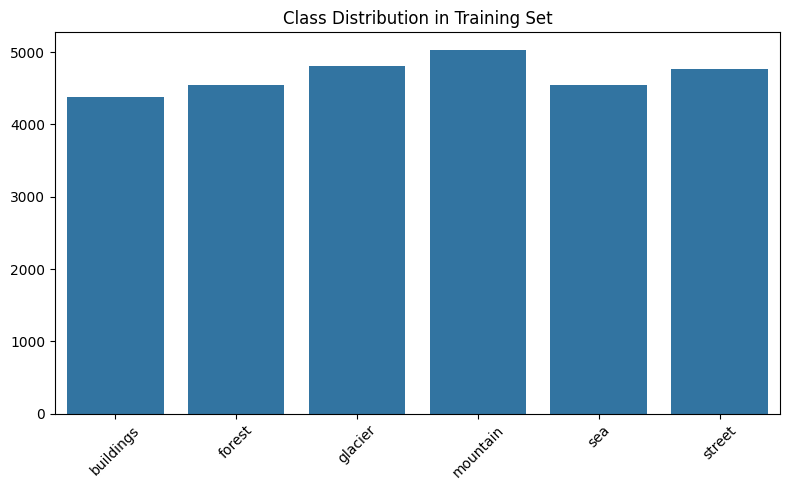

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
def show_random_images_per_class(dataset, classes, num_images=2):
    """
    Shows 'num_images' random images from each class in the dataset.
    """
    # Group image indices by class
    class_to_indices = {cls: [] for cls in classes}
    for idx, (_, label_idx) in enumerate(dataset.samples):
        class_to_indices[classes[label_idx]].append(idx)
    
    # For each class, pick random indices and visualize
    fig, axes = plt.subplots(len(classes), num_images, figsize=(num_images*3, len(classes)*3))
    if len(classes) == 1:
        axes = [axes]  # handle case with single class
    for i, cls in enumerate(classes):
        indices = class_to_indices[cls]
        random_indices = random.sample(indices, k=min(num_images, len(indices)))
        for j in range(num_images):
            ax = axes[i][j] if len(classes) > 1 else axes[j]
            sample_idx = random_indices[j]
            img_path, label_idx = dataset.samples[sample_idx]
            
            # Load the image directly (without transforms) for a raw look
            # If you want to see after transforms, you'd get it from dataset[sample_idx]
            from PIL import Image
            img = Image.open(img_path)
            
            ax.imshow(img)
            ax.set_title(f"Class: {cls}")
            ax.axis('off')
    plt.tight_layout()
    plt.show()

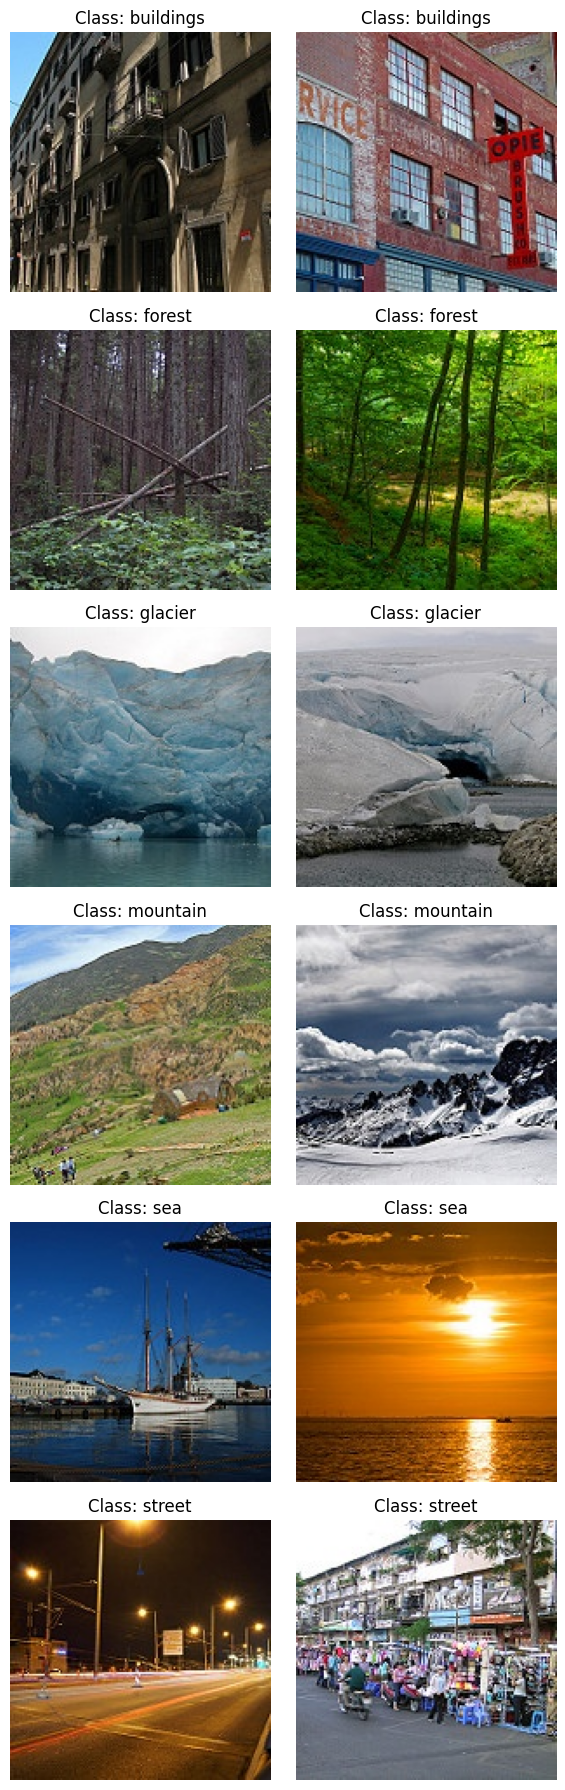

In [34]:
show_random_images_per_class(train_dataset, train_dataset.classes, num_images=2)